In [1]:
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import LSTM, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Trying LSTM's different structure 2

In [2]:
voc_size = 90000
batch_size = 500
max_length = 40
filters = 600
kernel_size = 3
dim = 200
embedding_matrix = np.random.randn(voc_size + 1, dim) * 0.01

In [4]:
model = Sequential()
model.add(Embedding(voc_size +1, dim, weights = [embedding_matrix], input_length = max_length))
model.add(Dropout(0.4))
model.add(LSTM(128))
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 200)           18000200  
                                                                 
 dropout (Dropout)           (None, 40, 200)           0         
                                                                 
 lstm (LSTM)                 (None, 128)               168448    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [6]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("airline_sentiment_analysis.csv")

In [8]:
X = data.text

In [9]:
result = np.where(data.airline_sentiment == "positive", 1, 0)

In [10]:
data['label'] = result

In [11]:
y = data.label

In [12]:
messages = X.copy()

In [13]:
import nltk
import re
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z]',' ',messages[i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [16]:
from tensorflow.keras.preprocessing.text import one_hot
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr

[[56782, 9287, 22435, 2788, 2178, 61795],
 [56782, 24708, 23981, 5145, 86697, 40144, 6252, 58364, 45950, 42766, 80779],
 [56782, 24708, 57248, 55512, 60047],
 [56782,
  64284,
  6674,
  72670,
  57413,
  61265,
  79808,
  24708,
  55512,
  60047,
  27740,
  14251],
 [56782, 80656, 66650, 52400, 87754, 27740, 17793, 13917, 65882, 19665, 75749],
 [56782, 79015],
 [56782, 75532, 42430, 42820, 57335, 68516],
 [56782, 2264, 87082, 37522, 2317, 79947, 65200, 10591],
 [56782,
  25262,
  70840,
  39253,
  77066,
  11873,
  26542,
  48781,
  45950,
  47783,
  9639,
  12571,
  26542,
  6233,
  9568],
 [56782,
  36983,
  27740,
  69095,
  82891,
  72988,
  41282,
  9490,
  15677,
  75749,
  56762,
  42200,
  20086,
  44102],
 [56782, 84764],
 [56782, 17428, 74593, 60600, 14006, 23671],
 [56782,
  25835,
  33905,
  14299,
  17083,
  57413,
  40894,
  64434,
  42634,
  84322,
  25262,
  60047,
  74977,
  53134,
  22369],
 [56782,
  16782,
  63046,
  17428,
  39607,
  47708,
  80230,
  61764,
  6126

In [17]:
sent_length = 40
embedded_docs = pad_sequences(onehot_repr, padding = 'pre', maxlen = sent_length)
print(embedded_docs)

[[    0     0     0 ...  2788  2178 61795]
 [    0     0     0 ... 45950 42766 80779]
 [    0     0     0 ... 57248 55512 60047]
 ...
 [    0     0     0 ... 11511 57413 55717]
 [    0     0     0 ...  4402 28088 11146]
 [    0     0     0 ... 89743  1677 89897]]


In [18]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [19]:
X_final.shape,y_final.shape

((11541, 40), (11541,))

In [20]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.30,random_state=42, stratify=y_final)

In [21]:
model.fit(X_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=128)

Epoch 1/5
64/64 [==============================] - 9s 38ms/step - loss: 0.4347 - accuracy: 0.8274 - val_loss: 0.2516 - val_accuracy: 0.8960
Epoch 2/5
64/64 [==============================] - 1s 17ms/step - loss: 0.1850 - accuracy: 0.9317 - val_loss: 0.2163 - val_accuracy: 0.9145
Epoch 3/5
64/64 [==============================] - 1s 17ms/step - loss: 0.1211 - accuracy: 0.9570 - val_loss: 0.2310 - val_accuracy: 0.9134
Epoch 4/5
64/64 [==============================] - 1s 17ms/step - loss: 0.0807 - accuracy: 0.9721 - val_loss: 0.2650 - val_accuracy: 0.9064
Epoch 5/5
64/64 [==============================] - 1s 18ms/step - loss: 0.0566 - accuracy: 0.9811 - val_loss: 0.3285 - val_accuracy: 0.9087


In [22]:
y_pred = (model.predict(x_test) > 0.5).astype("int64")

109/109 [==============================] - 1s 3ms/step


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [24]:
print(confusion_matrix(y_test,y_pred))

[[2663   91]
 [ 225  484]]


In [25]:
print(accuracy_score(y_pred,y_test))


0.9087496390412937


In [26]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2888
           1       0.68      0.84      0.75       575

    accuracy                           0.91      3463
   macro avg       0.82      0.88      0.85      3463
weighted avg       0.92      0.91      0.91      3463



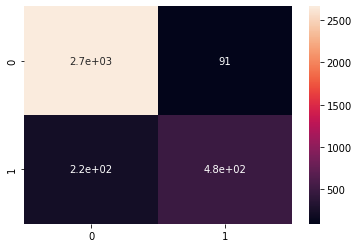

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

# Trying Bidirectional LSTM with structure 2

In [30]:
model2 = Sequential()
model2.add(Embedding(voc_size +1, dim, weights = [embedding_matrix], input_length = max_length))
model2.add(Dropout(0.4))
model2.add(Bidirectional(LSTM(128)))
model2.add(Dense(64))
model2.add(Dropout(0.5))
model2.add(Activation('relu'))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 200)           18000200  
                                                                 
 dropout_2 (Dropout)         (None, 40, 200)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                      

In [32]:
model2.fit(X_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=128)

Epoch 1/5
64/64 [==============================] - 5s 32ms/step - loss: 0.4173 - accuracy: 0.8319 - val_loss: 0.2408 - val_accuracy: 0.8984
Epoch 2/5
64/64 [==============================] - 1s 21ms/step - loss: 0.1833 - accuracy: 0.9324 - val_loss: 0.2127 - val_accuracy: 0.9160
Epoch 3/5
64/64 [==============================] - 1s 21ms/step - loss: 0.1212 - accuracy: 0.9575 - val_loss: 0.2421 - val_accuracy: 0.9116
Epoch 4/5
64/64 [==============================] - 1s 21ms/step - loss: 0.0799 - accuracy: 0.9733 - val_loss: 0.2579 - val_accuracy: 0.9062
Epoch 5/5
64/64 [==============================] - 1s 21ms/step - loss: 0.0568 - accuracy: 0.9807 - val_loss: 0.3057 - val_accuracy: 0.8989


In [33]:
y_pred2 = (model2.predict(x_test) > 0.5).astype("int64")

109/109 [==============================] - 1s 4ms/step


In [34]:
print(accuracy_score(y_pred2,y_test))

0.898931562229281


In [35]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2848
           1       0.69      0.79      0.74       615

    accuracy                           0.90      3463
   macro avg       0.82      0.86      0.84      3463
weighted avg       0.91      0.90      0.90      3463



In [36]:
print(confusion_matrix(y_test,y_pred2))

[[2626  128]
 [ 222  487]]


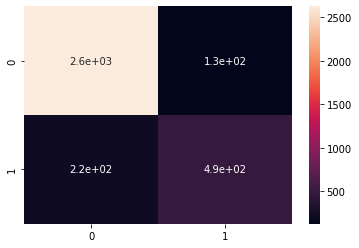

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True)